# Workshop 04

# Systems of Linear Equations

## Introduction to Numpy

Almost every calculation that we do in linear algebra will involve working with arrays of numbers. An array can be thought of as a collection of numbers arranged into rows and columns to form a rectangle, such as the example below, which has 2 rows and 4 columns.

$$\begin{bmatrix} 
5 & -1 & 1 & 0 \\
4 & 3 & 12 & -6
\end{bmatrix}$$
 
Although it is possible to represent arrays using a basic Python objects called lists, we will make use of NumPy array objects for our work. NumPy has a powerful way to represent arrays, and has many built-in tools for processing them efficiently. Just as with the math module, we have to first import NumPy before we can use it. This time we will use the code 

```python
import numpy as np
```

import numpy as np
, which imports the module but gives it a different name, called an alias, that is more convenient to type.

The easiest way to create the array above is to use the 
```python
array
```
function, and provide it a list of all the array entries in a specific format. The row entries are separated by commas and enclosed in square brackets `[]`, then all the rows listed together, separated by commas, and enclosed in another set of square brackets.

In [2]:
import numpy as np

## The object [[5, -1, 1, 0],[4, 3, 12, -6]], which gets passed into the array function is a Python list.
## The object returned by the array function is a NumPy array object.

A = np.array([ [5, -1, 1, 0], [4, 3, 12, -6] ])

print(A)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


Another way to create the array we want is to first make an array that is one long row, and then use the 

```python
reshape
```

function. This can be more convenient than typing the extra square brackets.

In [8]:
B = np.array([5, -1, 1, 0, 4, 3, 12, -6])
print("This is B before reshaping.")
print(B)

print('-' * 50)

C = B.reshape((2,4))
print("This is C, which is the entries of B formed into a new shape.")
print(C)

This is B before reshaping.
[ 5 -1  1  0  4  3 12 -6]
--------------------------------------------------
This is C, which is the entries of B formed into a new shape.
[[ 5 -1  1  0]
 [ 4  3 12 -6]]


We will often wish to make modifications to an array while keeping a copy of the original. In this situation we can duplicate an existing array with the 
```python
copy
```
 function.

In [4]:
D = np.copy(A)
print(D)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


In order to access individual entries in an array, we need to use a pair of indices to refer to the row and column of the entry we are accessing. As with almost every other computing language, the count begins at zero in Python! This means that the first row has index 0, the second has index 1 and so forth. The same is true for the columns. Beginning the count at zero is not difficult, but it does require an adjustment in thinking if one is new to programming.

In [5]:
print(A[0,2])

1


Sometimes it is useful to create an array that contains mostly zeros. In this case, we can create an array that contains all zeros, and then modify the few entries that we want to be nonzero.

In [56]:
## Create a 4x4 array that is all zeros.
D = np.zeros((4,4))

print(D)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [57]:
## Set entries along the main diagonal to 2.
for i in range(4):
    D[i,i] = 2
    
print(D)

[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]


--------------------------------

## Linear Systems

A linear system of $m$ equations with $n$ unknowns $x_1, x_2, x_3, \ldots, x_n$
, is a collection of equations that can be written in the following form.

$$\begin{align*} 
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 + \ldots + a_{1n}x_n & = b_1, \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + \ldots + a_{2n}x_n & = b_2, \\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 + \ldots + a_{3n}x_n & = b_3, \\
\vdots \hspace{3cm} \vdots \hspace{2cm} \vdots  & \hspace{5mm}  \vdots \\
a_{m1}x_1 + a_{m2}x_2 + a_{m3}x_3 + \ldots + a_{mn}x_n & = b_m
\end{align*}$$
  
Solutions to the linear system are collections of values for the unknowns that satisfy all of the equations simultaneously. The set of all possible solutions for the system is known as its solution set. A linear system that has at least one solution is said to be consistent, while a linear system that has no solutions is said to be inconsistent.

Linear systems with two equations and two unknowns are a great starting point since we easily graph the sets of points that satisfy each equation in the $x_1x_2$
 coordinate plane. The set of points that satisfy a single linear equation in two variables forms a line in the plane. Three examples will be sufficient to show the possible solution sets for linear systems in this setting.



### Example 1

$$\begin{align*} 
x_1 + 3x_2 & = 5 \\
x_1 - 2x_2 & = -5
\end{align*}$$
 
The solution set for each equation can be represented by a line, and the solution set for the linear system is represented by all points that lie on both lines. In this case the lines intersect at a single point and there is only one pair of values that satisfy both equations, $x_1 = -1$ and $x_2 = 2$. This linear system is consistent.

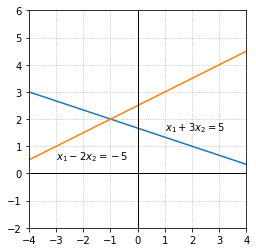

In [80]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)

fig, ax = plt.subplots()
# fig.set_figheight(3)
# fig.set_figwidth(8)
# fig.dpi = 150
ax.plot(x,(5-x)/3)
ax.plot(x,(5+x)/2)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(-3,0.5,'$x_1-2x_2 = -5$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k', linewidth = 1)
ax.axhline(color='k', linewidth = 1)

## This options specifies the ticks based the list of numbers provided.
ax.set_xticks(list(range(-4, 5)))
ax.set_aspect('equal')
ax.grid(True, ls=':')

### Example 2: System with no solutions

$$\begin{align*} 
x_1 + 3x_2 & = 5 \\
x_1 + 2x_2 & = 0
\end{align*}$$
 
In this example the solution sets of the individual equations represent lines that are parallel. There is no pair of values that satisfy both equations simultaneously. This linear system is inconsistent.

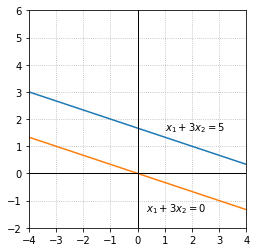

In [81]:
fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,-x/3)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(0.3,-1.4,'$x_1+3x_2 = 0$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

## This options specifies the ticks based the list of numbers provided.
ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

### Example 3: System with an infinite number of solutions

$$\begin{align*} 
x_1 + 3x_2 & = 5 \\
2x_1 + 4x_2 & = 10
\end{align*}$$

 
In the final example, the second equation is a multiple of the first equation. The solution set for both equations is represented by the same line and thus every point on the line is a solution to the linear system. This linear system is consistent.

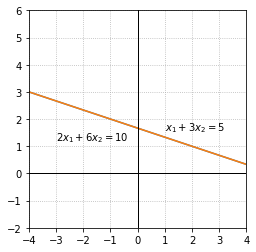

In [83]:
fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,(5-x)/3)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(-3,1.2,'$2x_1+6x_2 = 10$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

## Exercise
---------------

### Exercise 1
Consider the system of equations given below. Find a value for the coefficient $a$ so that the system has exactly **one solution**. For that value of $a$, find the solution to the system of equations and plot the lines formed by your equations to check your answer.

$$
\begin{align*}
ax_1 + 2x_2 & = 1 \\
4x_1 + 8x_2 & = 12
\end{align*}
$$

In [90]:
## Your solution here ...



### Exercise 2
Find a value for the coefficient $a$ so that the system has **no solution**. Plot the lines formed by your equations to verify there is no solution.

$$
\begin{align*}
ax_1 + 2x_2 & = 1 \\
4x_1 + 8x_2 & = 12
\end{align*}
$$

In [91]:
## Your solution here ...



### Exercise 3
Consider the system of equations given below. Under what conditions on the coefficients $a,b,c,d,e,f$
does this system have only one solution? No solutions? An infinite number of solutions? (Think about what must be true of the slopes and intercepts of the lines in each case.)

$$
\begin{align*}
ax_1 + bx_2 & = e \\
cx_1 + dx_2 & = f
\end{align*}
$$

In [93]:
## Your solution here ... 

